<a href="https://colab.research.google.com/github/Sanarazaaa/Mental-Disorder-Classification-Using-Random-Forest/blob/main/Mental_Disorder_Classification_Using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


df = pd.read_excel("/content/Mental disorder symptoms.xlsx")


df = df.dropna().drop_duplicates()


X = df.drop('Disorder', axis=1)
y = df['Disorder']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9130434782608695

Classification Report:
                       precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00         4
                 ASD       1.00      1.00      1.00         3
          Loneliness       1.00      1.00      1.00         1
                 MDD       0.50      0.50      0.50         2
                 OCD       1.00      1.00      1.00         1
                 PDD       0.50      0.50      0.50         2
                PTSD       1.00      1.00      1.00         2
            anexiety       1.00      1.00      1.00         2
             bipolar       1.00      1.00      1.00         1
     eating disorder       1.00      1.00      1.00         2
psychotic deprission       1.00      1.00      1.00         1
   sleeping disorder       1.00      1.00      1.00         2

            accuracy                           0.91        23
           macro avg       0.92      0.92      0.92        23
        weight

In [3]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)
print("CV mean accuracy:", cv_scores.mean())


CV mean accuracy: 0.9300395256916996


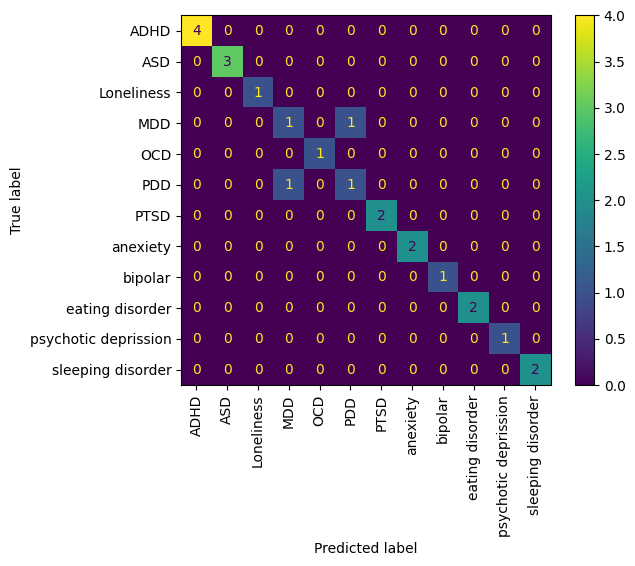

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, xticks_rotation=90)


Test Accuracy: 0.9318181818181818

Classification Report:
                       precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00         3
                 ASD       1.00      1.00      1.00         4
          Loneliness       1.00      1.00      1.00         4
                 MDD       0.80      1.00      0.89         4
                 OCD       1.00      0.75      0.86         4
                 PDD       1.00      0.75      0.86         4
                PTSD       1.00      0.75      0.86         4
            anexiety       1.00      1.00      1.00         4
             bipolar       0.75      1.00      0.86         3
     eating disorder       1.00      1.00      1.00         3
psychotic deprission       1.00      1.00      1.00         3
   sleeping disorder       0.80      1.00      0.89         4

            accuracy                           0.93        44
           macro avg       0.95      0.94      0.93        44
        w

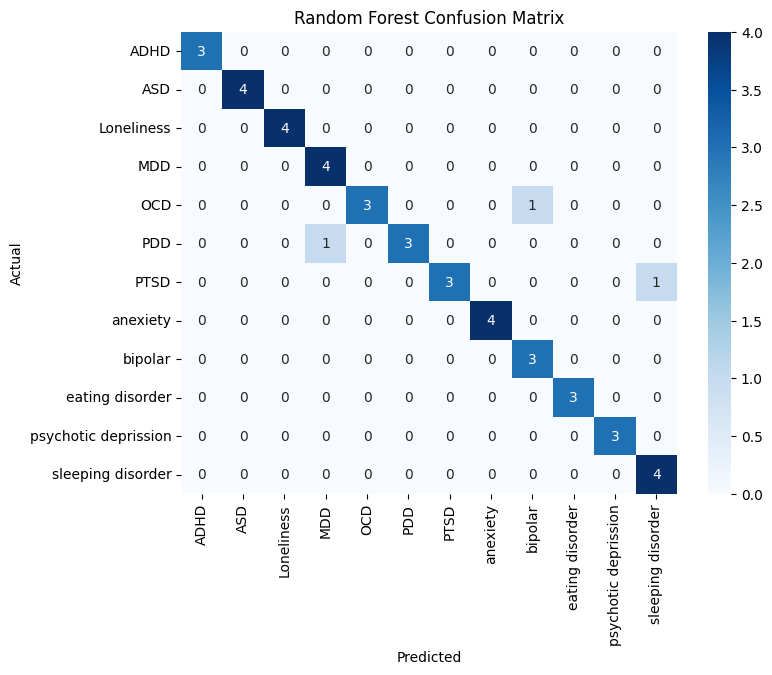

Cross-validation mean accuracy: 0.9584566596194503

Top 10 Important Features:
 introvert                      0.063457
increased.energy               0.059464
feeling.negative               0.052636
having.trouble.in.sleeping     0.051442
popping.up.stressful.memory    0.050826
avoids.people.or.activities    0.050480
close.friend                   0.048547
trouble.concentrating          0.046388
trouble.in.concentration       0.043227
hopelessness                   0.042488
dtype: float64


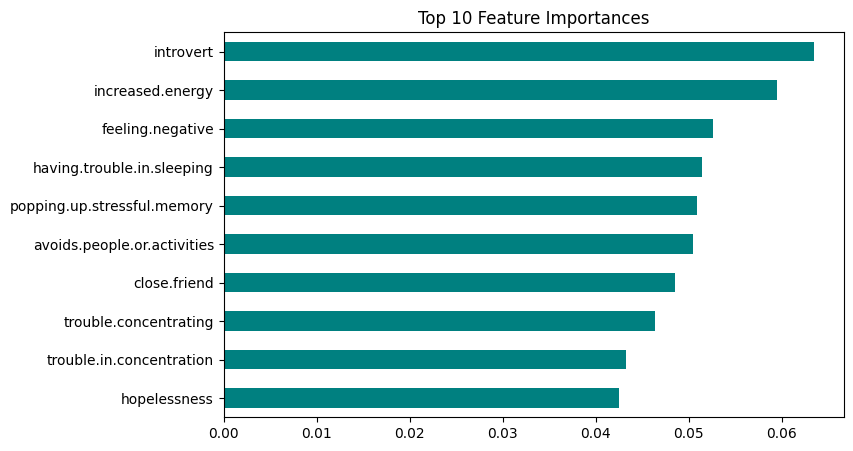

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

smote = SMOTE(random_state=42, k_neighbors=4)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

model = RandomForestClassifier(
    n_estimators=100, random_state=42, class_weight="balanced"
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
print("Cross-validation mean accuracy:", cv_scores.mean())

importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n", feature_importance.head(10))
plt.figure(figsize=(8,5))
feature_importance.head(10).plot(kind="barh", color="teal")
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid.fit(X_resampled, y_resampled)
print("\nBest Hyperparameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [7]:
print(y.value_counts())

Disorder
ADHD                    18
ASD                     14
eating disorder         11
MDD                     11
PDD                      9
sleeping disorder        9
anexiety                 9
PTSD                     9
Loneliness               7
bipolar                  6
psychotic deprission     6
OCD                      5
Name: count, dtype: int64
